In [3]:
from transformers import BertModel, BertTokenizer, get_linear_schedule_with_warmup
from datasets import *

In [4]:
tokenizer = BertTokenizer(
    "../../weights/biobert-pt-v1.0-pubmed-pmc/vocab.txt",
    do_lower_case=False
)

In [5]:
lbl_filter = ['PRODUCT-OF', 'ACTIVATOR', 'ANTAGONIST', 'INDIRECT-UPREGULATOR', 'INDIRECT-DOWNREGULATOR', 'SUBSTRATE', 'PART-OF', 'DIRECT-REGULATOR', 'INHIBITOR', 'AGONIST-ACTIVATOR', 'SUBSTRATE_PRODUCT-OF', 'AGONIST', 'AGONIST-INHIBITOR', 'NA']

train_data = DrugProtDataset(tokenizer, lbl_filter, 128, 1)
train_data.load("../../datasets/drugprot-gs-training-development-test/{}/re_input_all.tsv".format("training"))

valid_data = DrugProtDataset(tokenizer, lbl_filter, 128, 1)
valid_data.load("../../datasets/drugprot-gs-training-development-test/{}/re_input_all.tsv".format("development"))

testt_data = DrugProtDataset(tokenizer, lbl_filter, 128, 1)
testt_data.load("../../datasets/drugprot-gs-training-development-test/{}/re_input_all.tsv".format("test"))

Upsampling ratio : 1
Previous / new count : 66502 66502
Upsampling ratio : 1
Previous / new count : 13809 13809
Upsampling ratio : 1
Previous / new count : 229590 229590


In [9]:
train_data.data[:10], train_data.data[-10:]

([(('17512723', 'Arg1:T9', 'Arg2:T1'),
   'We show that murine Rdh12 and human RDH13 do not reveal activity towards the checked steroids, but that @GENE$ reduces dihydrotestosterone to @CHEMICAL$, and is thus also involved in steroid metabolism.',
   'PRODUCT-OF'),
  (('23557993', 'Arg1:T18', 'Arg2:T31'),
   'The h-OB were 10-100 fold more sensitive to DPHD than transformed osteoblasts: @CHEMICAL$ increased h-OB proliferation at 10nM and, at 100nM, activated @GENE$ signaling within 30min.',
   'ACTIVATOR'),
  (('23557993', 'Arg1:T1', 'Arg2:T24'),
   'Effects of @CHEMICAL$ were eliminated by the @GENE$ antagonist ICI182780.',
   'ACTIVATOR'),
  (('23557993', 'Arg1:T24', 'Arg2:T3'),
   'Effects of DPHD were eliminated by the @GENE$ antagonist @CHEMICAL$.',
   'ANTAGONIST'),
  (('23557993', 'Arg1:T4', 'Arg2:T25'),
   'During differentiation, @CHEMICAL$ promoted early expression of osteoblast transcription factors, @GENE$ and osterix.',
   'INDIRECT-UPREGULATOR'),
  (('23557993', 'Arg1:T4'

In [37]:
testt_sents = [d[1] for d in testt_data.data]; 
train_sents = [d[1] for d in train_data.data]; 
valid_sents = [d[1] for d in valid_data.data]; 
testt_lblss = [d[2] for d in testt_data.data]; 
train_lblss = [d[2] for d in train_data.data]; 
valid_lblss = [d[2] for d in valid_data.data]; 

In [17]:
train_sents[:5], "\n" + "*"*20+"\n", valid_sents[:5], "\n"+ "*"*20 + "\n", testt_sents[:5]

(['We show that murine Rdh12 and human RDH13 do not reveal activity towards the checked steroids, but that @GENE$ reduces dihydrotestosterone to @CHEMICAL$, and is thus also involved in steroid metabolism.',
  'The h-OB were 10-100 fold more sensitive to DPHD than transformed osteoblasts: @CHEMICAL$ increased h-OB proliferation at 10nM and, at 100nM, activated @GENE$ signaling within 30min.',
  'Effects of @CHEMICAL$ were eliminated by the @GENE$ antagonist ICI182780.',
  'Effects of DPHD were eliminated by the @GENE$ antagonist @CHEMICAL$.',
  'During differentiation, @CHEMICAL$ promoted early expression of osteoblast transcription factors, @GENE$ and osterix.'],
 '\n********************\n',
 ['Preincubation (30 min) of bovine tracheal smooth muscle with various concentrations (0.1, 1 and 10 microM) of fenoterol decreased @CHEMICAL$-induced maximal relaxation (E(max)) of methacholine-contracted preparations in a concentration dependent fashion, indicating desensitization of the @GENE$

In [61]:
import math
abs(-5)

5

In [62]:
tokenized_train_sents = []
dx_bw_ent_train_sents = []

for s in train_sents:
    inp_ids = tokenizer(s)["input_ids"]
    tokenized_train_sents.append(inp_ids)
    gene_loc = 0; chem_loc = 0
    x_vals = inp_ids
    for i in range(len(x_vals)):
        if x_vals[i] == 137 and x_vals[i+1] == 24890:
            chem_loc = i
        if x_vals[i] == 137 and x_vals[i+1] == 25075:
            gene_loc = i
    dx_bw_ent_train_sents.append(abs(gene_loc - chem_loc))

In [63]:
tokenized_valid_sents = []
dx_bw_ent_valid_sents = []

for s in valid_sents:
    inp_ids = tokenizer(s)["input_ids"]
    gene_loc = 0; chem_loc = 0
    x_vals = inp_ids
    for i in range(len(x_vals)):
        if x_vals[i] == 137 and x_vals[i+1] == 24890:
            chem_loc = i
        if x_vals[i] == 137 and x_vals[i+1] == 25075:
            gene_loc = i
    dx_bw_ent_valid_sents.append(abs(gene_loc - chem_loc))
    tokenized_valid_sents.append(inp_ids)

In [64]:
tokenized_testt_sents = []
dx_bw_ent_testt_sents = []

for s in testt_sents:
    inp_ids = tokenizer(s)["input_ids"]
    gene_loc = 0; chem_loc = 0
    x_vals = inp_ids
    for i in range(len(x_vals)):
        if x_vals[i] == 137 and x_vals[i+1] == 24890:
            chem_loc = i
        if x_vals[i] == 137 and x_vals[i+1] == 25075:
            gene_loc = i
    dx_bw_ent_testt_sents.append(abs(gene_loc - chem_loc))
    tokenized_testt_sents.append(inp_ids)

In [30]:
# tokenizer(train_sents[0])["input_ids"]

In [24]:
import seaborn as sns

In [31]:
len_tr_tok_sents = [len(a) for a in tokenized_train_sents]
len_vd_tok_sents = [len(a) for a in tokenized_valid_sents]
len_te_tok_sents = [len(a) for a in tokenized_testt_sents]



/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

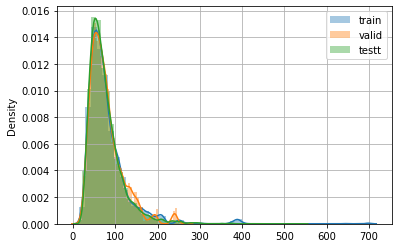

In [54]:
import matplotlib.pyplot as plt
sns.distplot(len_tr_tok_sents, label="train")
sns.distplot(len_vd_tok_sents, label="valid")
sns.distplot(len_te_tok_sents, label="testt")
plt.grid()
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

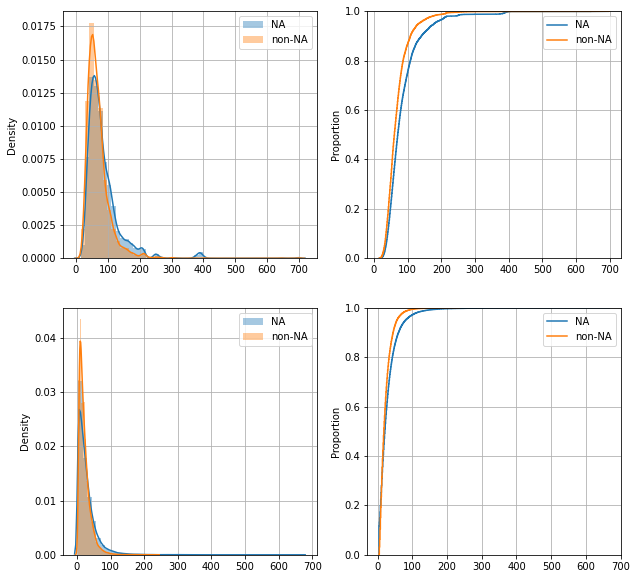

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

sents_nonna_len = []
sents_na_len    = []
dx_na_len       = []
dx_nonna_len    = []

for x, z, y in zip(len_tr_tok_sents, dx_bw_ent_train_sents, train_lblss):
    if y == "NA":
        sents_na_len.append(x)
        dx_na_len.append(z)
    else:
        sents_nonna_len.append(x)
        dx_nonna_len.append(z)
        
sns.distplot(sents_na_len, label="NA", ax=axs[0][0])
sns.distplot(sents_nonna_len, label="non-NA", ax=axs[0][0])
sns.ecdfplot(sents_na_len, label="NA", ax=axs[0][1])
sns.ecdfplot(sents_nonna_len, label="non-NA", ax=axs[0][1])

sns.distplot(dx_na_len, label="NA", ax=axs[1][0])
sns.distplot(dx_nonna_len, label="non-NA", ax=axs[1][0])
sns.ecdfplot(dx_na_len, label="NA", ax=axs[1][1])
sns.ecdfplot(dx_nonna_len, label="non-NA", ax=axs[1][1])

for aaaa in axs:
    for bbbb in aaaa:
        bbbb.legend()
        bbbb.grid() 
# plt.grid()
# plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

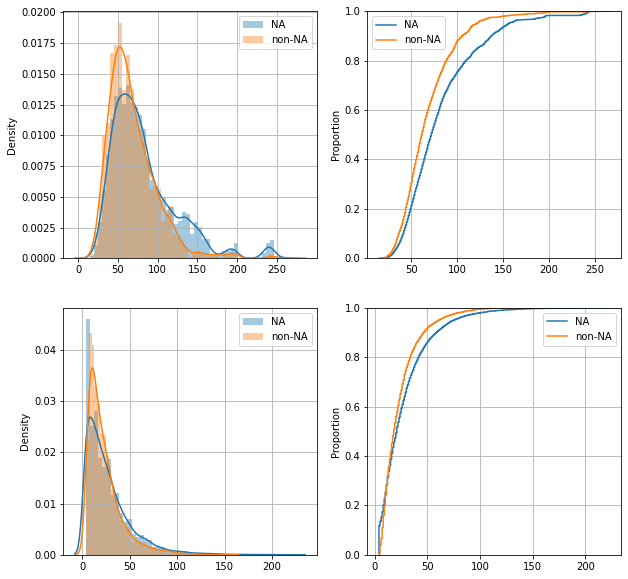

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

sents_nonna_len = []
sents_na_len    = []
dx_na_len       = []
dx_nonna_len    = []

for x, z, y in zip(len_vd_tok_sents, dx_bw_ent_valid_sents, valid_lblss):
    if y == "NA":
        sents_na_len.append(x)
        dx_na_len.append(z)
    else:
        sents_nonna_len.append(x)
        dx_nonna_len.append(z)
        
sns.distplot(sents_na_len, label="NA", ax=axs[0][0])
sns.distplot(sents_nonna_len, label="non-NA", ax=axs[0][0])
sns.ecdfplot(sents_na_len, label="NA", ax=axs[0][1])
sns.ecdfplot(sents_nonna_len, label="non-NA", ax=axs[0][1])

sns.distplot(dx_na_len, label="NA", ax=axs[1][0])
sns.distplot(dx_nonna_len, label="non-NA", ax=axs[1][0])
sns.ecdfplot(dx_na_len, label="NA", ax=axs[1][1])
sns.ecdfplot(dx_nonna_len, label="non-NA", ax=axs[1][1])

for aaaa in axs:
    for bbbb in aaaa:
        bbbb.legend()
        bbbb.grid() 
# plt.grid()
# plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcou

KeyError: 'pop from an empty set'

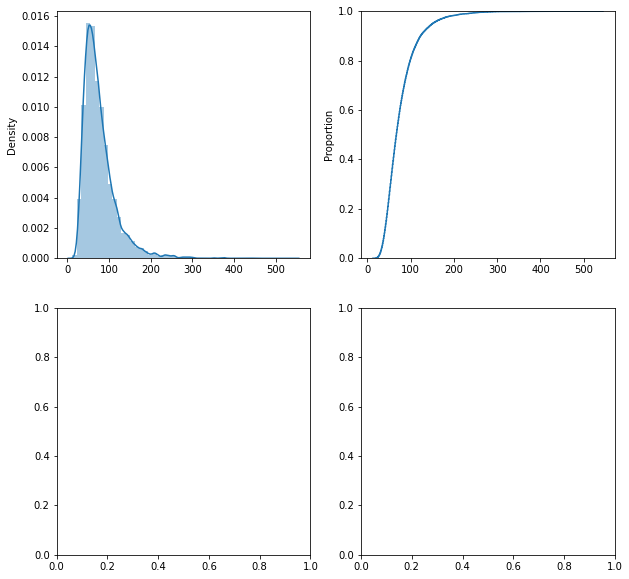

In [70]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

sents_nonna_len = []
sents_na_len    = []
dx_na_len       = []
dx_nonna_len    = []

for x, z, y in zip(len_te_tok_sents, dx_bw_ent_testt_sents, testt_lblss):
    if y == "NA":
        sents_na_len.append(x)
        dx_na_len.append(z)
    else:
        sents_nonna_len.append(x)
        dx_nonna_len.append(z)
        
sns.distplot(sents_na_len, label="NA", ax=axs[0][0])
sns.distplot(sents_nonna_len, label="non-NA", ax=axs[0][0])
sns.ecdfplot(sents_na_len, label="NA", ax=axs[0][1])
sns.ecdfplot(sents_nonna_len, label="non-NA", ax=axs[0][1])

sns.distplot(dx_na_len, label="NA", ax=axs[1][0])
sns.distplot(dx_nonna_len, label="non-NA", ax=axs[1][0])
sns.ecdfplot(dx_na_len, label="NA", ax=axs[1][1])
sns.ecdfplot(dx_nonna_len, label="non-NA", ax=axs[1][1])

for aaaa in axs:
    for bbbb in aaaa:
        bbbb.legend()
        bbbb.grid() 
# plt.grid()
# plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


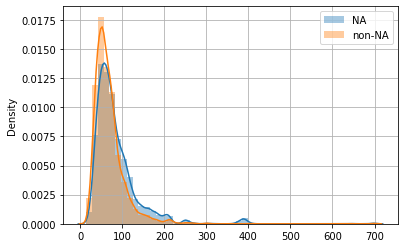

In [55]:
sents_nonna_len = []
sents_na_len    = []

for x, y in zip(len_tr_tok_sents, train_lblss):
    if y == "NA":
        sents_na_len.append(x)
    else:
        sents_nonna_len.append(x)
        
sns.distplot(sents_na_len, label="NA")
sns.distplot(sents_nonna_len, label="non-NA")
plt.grid()
plt.legend()

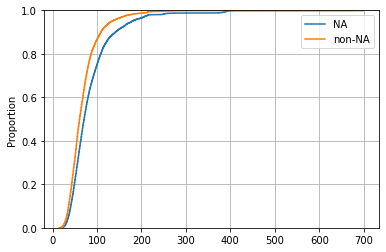

In [56]:
sns.ecdfplot(sents_na_len, label="NA")
sns.ecdfplot(sents_nonna_len, label="non-NA")
plt.grid()
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


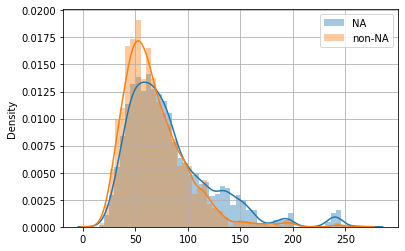

In [57]:
sents_nonna_len = []
sents_na_len    = []

for x, y in zip(len_vd_tok_sents, valid_lblss):
    if y == "NA":
        sents_na_len.append(x)
    else:
        sents_nonna_len.append(x)
        
sns.distplot(sents_na_len, label="NA")
sns.distplot(sents_nonna_len, label="non-NA")
plt.grid()
plt.legend()

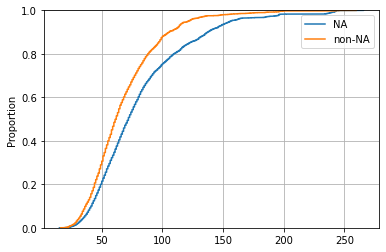

In [58]:
sns.ecdfplot(sents_na_len, label="NA")
sns.ecdfplot(sents_nonna_len, label="non-NA")
plt.grid()
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcou

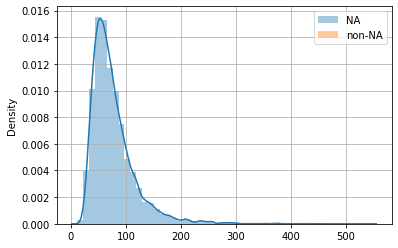

In [59]:
sents_nonna_len = []
sents_na_len    = []

for x, y in zip(len_te_tok_sents, testt_lblss):
    if y == "NA":
        sents_na_len.append(x)
    else:
        sents_nonna_len.append(x)
        
sns.distplot(sents_na_len, label="NA")
sns.distplot(sents_nonna_len, label="non-NA")
plt.grid()
plt.legend()